Examine the provided datasets and describe their structure.

In [1]:
# 1.1) Analyzing the dataset

import pandas as pd

# Load the dataset
df = pd.read_excel('customer_churn_data.xlsx')

# Inspect the first few rows
print(df.head())

# Get a summary of the dataset
print(df.info())

# Describe the dataset
print(df.describe())

# Check data types
print(df.dtypes)

# Check for missing values
print("\n\nMissing values:\n")
print(df.isna().sum())


FileNotFoundError: [Errno 2] No such file or directory: 'customer_churn_data.xlsx'

1.2) Selecting some features for churn analyis

selected_features = [
    'tenure in months', 'Monthly Average Balance (USD)', 'Netbanking',
    'MobileApp', 'TechSupport Availed', 'Credit Cards', 'Loan Account'
]

In [ ]:
# Removing irrelevant columns for now
if 'Recommendation' in df.columns:
    df.drop(columns=['Recommendation'], inplace=True)

# Converting categorical data to numerical data
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)  # Ensure uniform type
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

# # Save the preprocessed dataset into a new Excel file
# df.to_excel('preprocessed_dataset.xlsx', index=False)

# print("Preprocessed dataset saved to 'preprocessed_dataset.xlsx'.")




,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,...,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category
0,560,1,0,0,1,1.0,1,0,1,0,...,0,0,0,0,0,44.0,567,0,149,2
1,544,1,0,1,1,72.0,0,0,1,1,...,1,1,1,2,1,64.8,601,0,205,4
2,570,0,1,0,0,20.0,1,1,3,0,...,0,0,1,0,1,94.1,190,1,313,10
3,433,0,0,0,0,47.0,1,1,1,1,...,1,0,0,2,1,65.0,388,0,245,15
4,659,0,0,1,1,54.0,1,1,3,1,...,0,1,1,0,1,104.1,719,0,305,10


# Handling Missing Values:

Missing Data Types: Differentiate between MCAR, MAR, and MNAR (Missing Completely at Random, Missing at Random, Missing Not at Random).
Imputation Techniques:
Mean/Median Imputation: Replace missing values with mean or median (numerical data).
Mode Imputation: Replace missing values with the mode (categorical data).
Forward/Backward Fill: Propagate next/previous values for time series data.
Dropping: Remove rows or columns with excessive missing data.
Handling Outliers:

Identifying Outliers: Use techniques like box plots, z-scores, or IQR to detect outliers.
Outlier Treatment:
Cap/Clamp: Replace outliers with a maximum or minimum threshold value.
Transformation: Apply transformations (e.g., log, square root) to reduce the impact of outliers.
Exclusion: In some cases, remove outliers from the dataset.

In [ ]:
# Handle missing values by forward imputation
df.fillna(method='ffill', inplace=True)



# Outliers can be handled based on domain knowledge or specific analysis
# Example: Removing outliers in 'Monthly Average Balance (USD)' using Interquartile Range (IQR) method
# Q1 = df['Monthly Average Balance (USD)'].quantile(0.25)
# Q3 = df['Monthly Average Balance (USD)'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df = df[(df['Monthly Average Balance (USD)'] >= lower_bound) & (df['Monthly Average Balance (USD)'] <= upper_bound)]


import pandas as pd

# Load your dataset
# df = pd.read_excel('your_file.xlsx')

# Define the column to check for outliers
column_name = 'Monthly Average Balance (USD)'

# Compute mean and standard deviation
mean = df[column_name].mean()
std_dev = df[column_name].std()

# Define the multiplier for standard deviation
k = 3  # Typically 2 or 3

# Define bounds
lower_bound = mean - k * std_dev
upper_bound = mean + k * std_dev

# Filter the DataFrame to keep only the values within bounds
df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Original Data Size: {df.shape[0]}")
print(f"Filtered Data Size: {df_filtered.shape[0]}")



# Save the preprocessed dataset into a new Excel file
# df.to_excel('preprocessed_dataset.xlsx', index=False)

# print("Preprocessed dataset saved to 'preprocessed_dataset.xlsx'.")



Lower Bound: -23.15768357628589
Upper Bound: 156.23836425696658
Original Data Size: 999
Filtered Data Size: 999


<ipython-input-4-8ae1a1655c2b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


<ipython-input-5-a3e387fef4ee>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


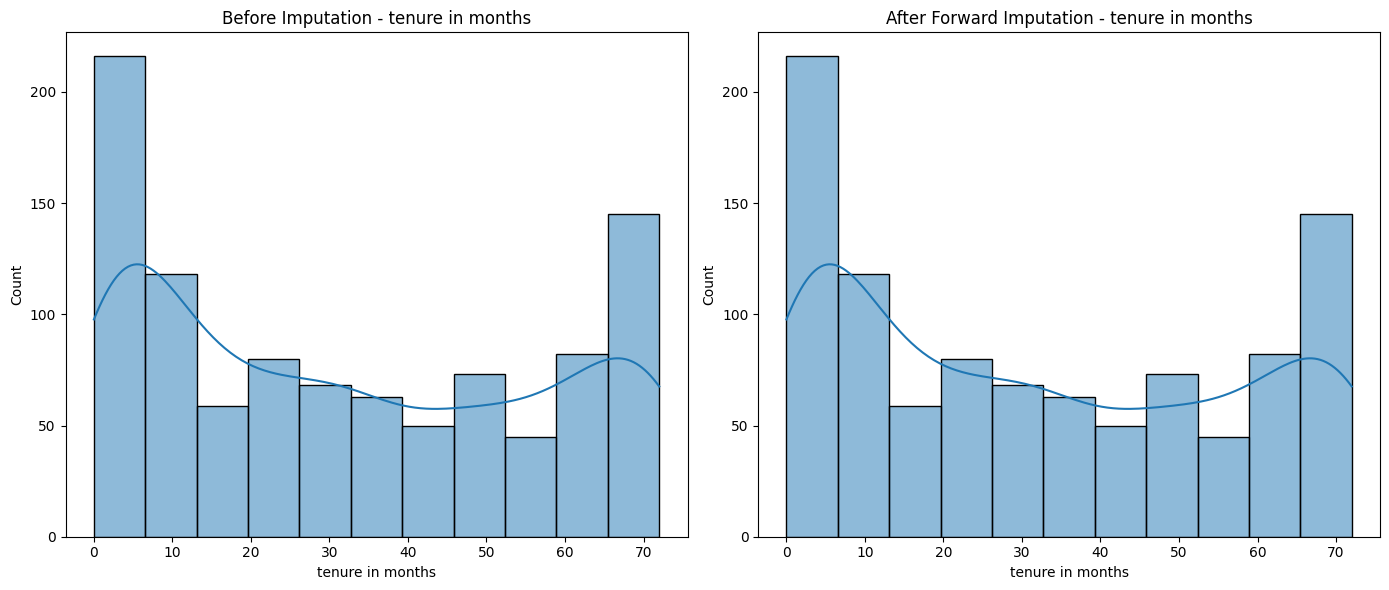

Boxplot before removing outliers:


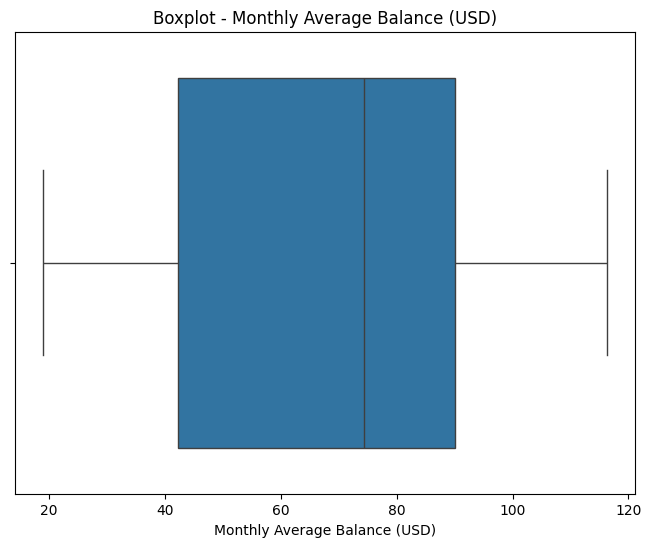

Boxplot after removing outliers:


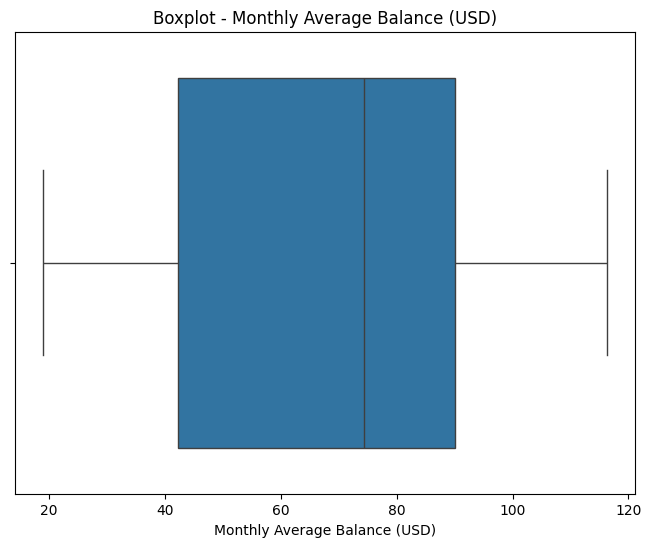

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting before and after forward imputation
def plot_imputation(df, column_name):
    # Before imputation
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(df[column_name], kde=True, ax=axes[0])
    axes[0].set_title(f'Before Imputation - {column_name}')

    # Apply forward imputation
    df.fillna(method='ffill', inplace=True)

    # After imputation
    sns.histplot(df[column_name], kde=True, ax=axes[1])
    axes[1].set_title(f'After Forward Imputation - {column_name}')

    plt.tight_layout()
    plt.show()

# Plotting boxplot to show outliers
def plot_boxplot(df, column_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot - {column_name}')
    plt.show()

# Sample dataset and feature to be used
# Plotting imputation technique for 'tenure in months'
plot_imputation(df, 'tenure in months')

# Plotting boxplot for 'Monthly Average Balance (USD)' before outlier removal
print("Boxplot before removing outliers:")
plot_boxplot(df, 'Monthly Average Balance (USD)')

# Handle missing values by forward imputation (already done in the imputation function)
# Outliers can be handled based on domain knowledge or specific analysis
# Example: Removing outliers in 'Monthly Average Balance (USD)' using IQR
Q1 = df['Monthly Average Balance (USD)'].quantile(0.25)
Q3 = df['Monthly Average Balance (USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Monthly Average Balance (USD)'] >= lower_bound) & (df['Monthly Average Balance (USD)'] <= upper_bound)]

# Plotting boxplot for 'Monthly Average Balance (USD)' after outlier removal
print("Boxplot after removing outliers:")
plot_boxplot(df, 'Monthly Average Balance (USD)')


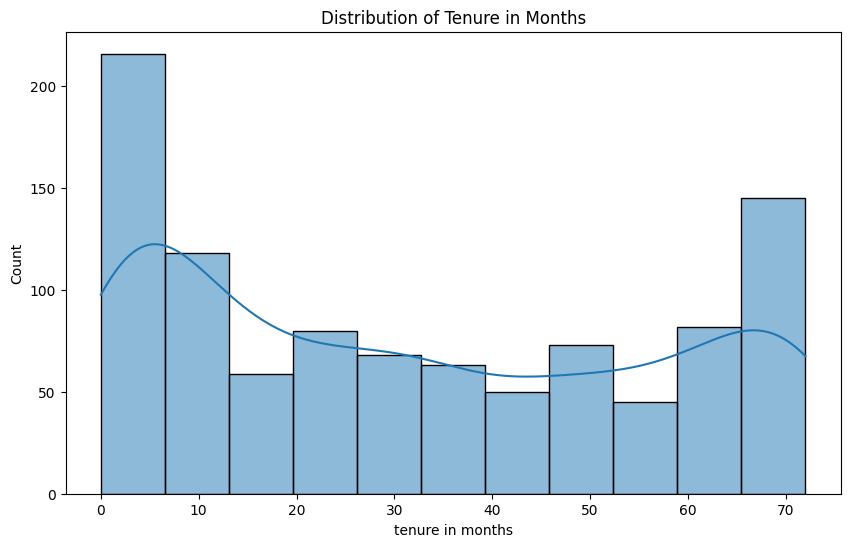

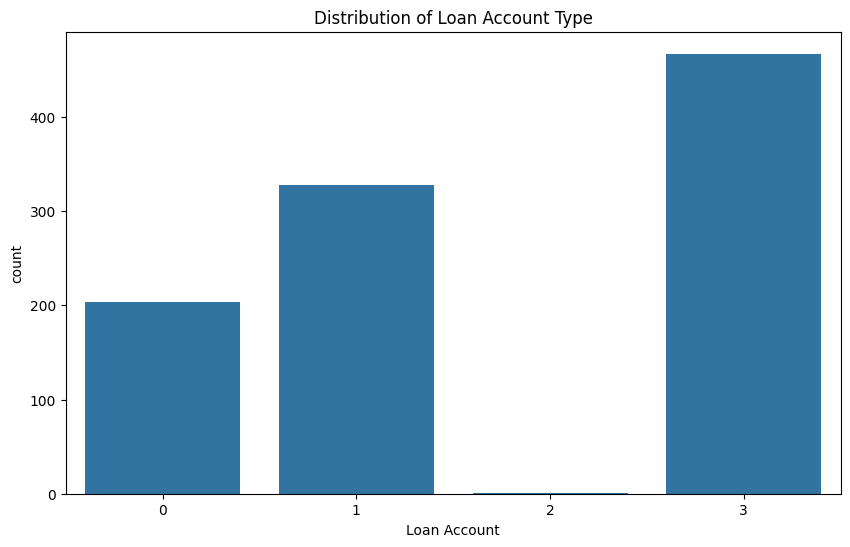

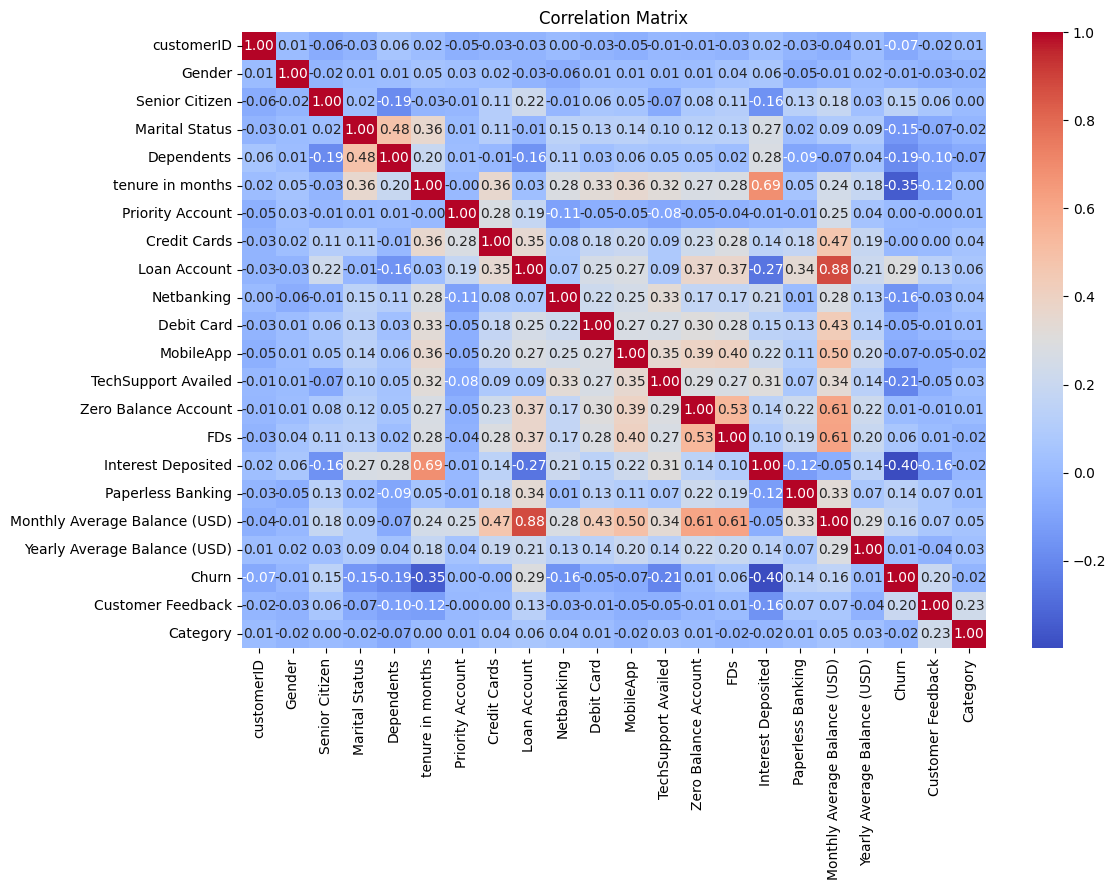

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of 'tenure in months'
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure in months'], kde=True)
plt.title('Distribution of Tenure in Months')
plt.show()

# Distribution of 'Loan Account' type
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan Account', data=df)
plt.title('Distribution of Loan Account Type')
plt.show()

# Compute and plot correlation matrix
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



Building the Model for Churn prediction

●	Select and justify appropriate machine learning algorithms for churn prediction.
●	Implement feature engineering techniques to improve model performance.
●	Develop at least two different models.
●	Evaluate and compare model performance using relevant metrics.
●	Identify the most important features contributing to churn.


In [ ]:
# 1. Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the regression model
model = LogisticRegression(max_iter=1000)  # Logistic Regression for classification
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# print("Logistic Regression model training completed for churn")


Logistic Regression Model Accuracy: 0.745

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       146
           1       0.54      0.35      0.43        54

    accuracy                           0.74       200
   macro avg       0.67      0.62      0.63       200
weighted avg       0.72      0.74      0.73       200



Random forest model

<ipython-input-8-ea6b92b1f17d>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Random Forest Model Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       146
           1       0.69      0.46      0.56        54

    accuracy                           0.80       200
   macro avg       0.76      0.69      0.71       200
weighted avg       0.79      0.80      0.79       200


Feature Importances:
                          Feature  Importance
5                tenure in months    0.162671
17  Monthly Average Balance (USD)    0.115662
19              Customer Feedback    0.109745
15             Interest Deposited    0.099537
0                      customerID    0.091320
18   Yearly Average Balance (USD)    0.091238
20                       Category    0.072737
8                    Loan Account    0.051816
12            TechSupport Availed    0.020508
1                          Gender    0.019410
16              Paperless Banking    0.019303
2                  Senior Citizen    0.01

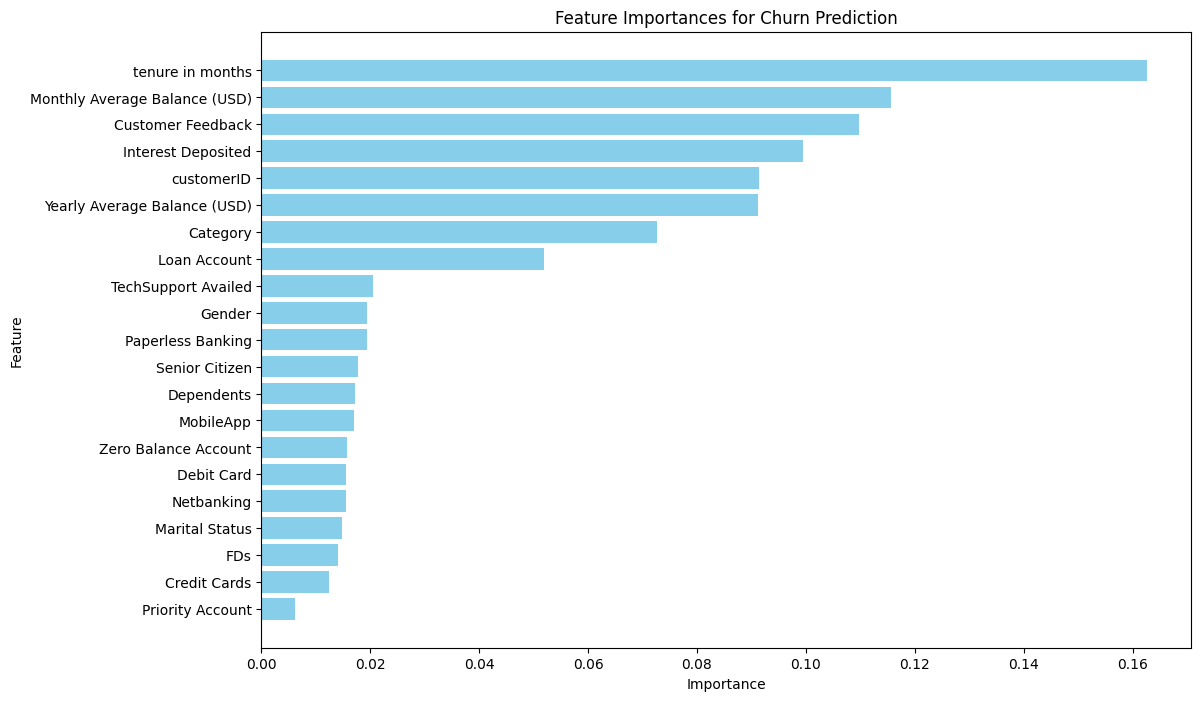

Feature importance analysis completed and dataset saved.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
# df = pd.read_excel('customer_churn_data_usecase1.xlsx')

# Remove the 'recommendation' column if it exists
if 'Recommendation' in df.columns:
    df.drop(columns=['Recommendation'], inplace=True)

# Handle missing values by forward imputation
df.fillna(method='ffill', inplace=True)

# Convert categorical data to numerical data
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)  # Ensure uniform type
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and the target
features = df.drop(columns=['Churn'])  # All columns except the target
target = df['Churn']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Extract feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\nFeature Importances:")
print(features_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Churn Prediction')
plt.gca().invert_yaxis()
plt.show()

# Save the modified dataset after preprocessing
df.to_excel('preprocessed_churn_data.xlsx', index=False)

print("Feature importance analysis completed and dataset saved.")


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure you have the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load your dataset
df = pd.read_excel('customer_churn_data.xlsx')

# Preprocess Textual Data
def preprocess_text(text):
    text = str(text).lower()  # Convert to string and lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation and special characters
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(tokens)

# Apply preprocessing
df['Processed Feedback'] = df['Customer Feedback'].apply(preprocess_text)

# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Compound score ranges from -1 to 1

df['Sentiment'] = df['Processed Feedback'].apply(get_sentiment)

# Summary of Sentiment
sentiment_summary = df['Sentiment'].describe()
print("\nSentiment Summary:")
print(sentiment_summary)

# Keyword Extraction using CountVectorizer
vectorizer = CountVectorizer(max_features=100)  # Limit to top 100 features
X = vectorizer.fit_transform(df['Processed Feedback'])
feature_names = vectorizer.get_feature_names_out()

# Topic Modeling using LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Number of topics
lda.fit(X)

# Display Topics with Actual Words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

print("\nTopics Extracted by LDA:")
display_topics(lda, feature_names, no_top_words=10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



Sentiment Summary:
count    999.000000
mean       0.148403
std        0.300404
min       -0.757900
25%        0.000000
50%        0.000000
75%        0.401900
max        0.875000
Name: Sentiment, dtype: float64

Topics Extracted by LDA:

Topic 1:
loan process deposit fixed long processing complicated time easy opening

Topic 2:
customer service bank support credit card online helpful cards debit

Topic 3:
card debit credit process loan high pin confusing charges interest

Topic 4:
account savings current branch get balance high requirement minimum interest

Topic 5:
banking mobile app atm online slow documentation often support network


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure you have the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load your dataset
df = pd.read_excel('customer_churn_data.xlsx')

# Preprocess Textual Data
def preprocess_text(text):
    text = str(text).lower()  # Convert to string and lowercasing
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation and special characters
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(tokens)

# Apply preprocessing
df['Processed Feedback'] = df['Customer Feedback'].apply(preprocess_text)

# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Compound score ranges from -1 to 1

df['Sentiment'] = df['Processed Feedback'].apply(get_sentiment)

# Topic Modeling using LDA
vectorizer = CountVectorizer(max_features=100)  # Limit to top 100 features
X = vectorizer.fit_transform(df['Processed Feedback'])
feature_names = vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Number of topics
lda.fit(X)

# Assign Topics
def get_topic_distribution(text):
    text_vector = vectorizer.transform([text])
    topic_distribution = lda.transform(text_vector)
    return topic_distribution[0]

df['Topic Distribution'] = df['Processed Feedback'].apply(get_topic_distribution)

# Define actions based on topics
def get_recommendation(topic_distribution, sentiment):
    topic_index = topic_distribution.argmax()
    if sentiment < 0:
        if topic_index == 0:
            return "Streamline loan processing and account activation procedures."
        elif topic_index == 1:
            return "Improve the quality and responsiveness of customer support."
        elif topic_index == 2:
            return "Simplify card usage procedures and enhance overall functionality."
        elif topic_index == 3:
            return "Review and potentially adjust interest rates or enhance savings account offerings."
        elif topic_index == 4:
            return "Optimize digital banking services and ensure reliable network performance."
    else:
        return "No specific action needed, customer feedback is positive."

df['Recommendation'] = df.apply(lambda row: get_recommendation(row['Topic Distribution'], row['Sentiment']), axis=1)

# Save the modified dataset with recommendations
df.to_excel('your_dataset_with_recommendations.xlsx', index=False)

print("Recommendations have been generated and saved successfully.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Recommendations have been generated and saved successfully.


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure you have the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load your dataset
df = pd.read_excel('customer_churn_data.xlsx')

# Preprocess Textual Data
def preprocess_text(text):
    text = str(text).lower()  # Convert to string and lowercasing
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation and special characters
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(tokens)

# Apply preprocessing
df['Processed Feedback'] = df['Customer Feedback'].apply(preprocess_text)

# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Compound score ranges from -1 to 1

df['Sentiment'] = df['Processed Feedback'].apply(get_sentiment)

# Topic Modeling using LDA
vectorizer = CountVectorizer(max_features=100)  # Limit to top 100 features
X = vectorizer.fit_transform(df['Processed Feedback'])
feature_names = vectorizer.get_feature_names_out()

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Number of topics
lda.fit(X)

# Assign Topics
def get_topic_distribution(text):
    text_vector = vectorizer.transform([text])
    topic_distribution = lda.transform(text_vector)
    return topic_distribution[0]

df['Topic Distribution'] = df['Processed Feedback'].apply(get_topic_distribution)

# Define recommendations based on sentiment and topic distribution
def get_recommendation(topic_distribution, sentiment):
    topic_index = topic_distribution.argmax()

    if sentiment < -0.5:
        recommendation = "Urgent Action Needed: "
    elif sentiment < 0:
        recommendation = "Improvement Required: "
    else:
        recommendation = "Positive Feedback: "

    if topic_index == 0:
        recommendation += "Consider streamlining loan processing and account activation procedures."
    elif topic_index == 1:
        recommendation += "Enhance the quality and responsiveness of customer support."
    elif topic_index == 2:
        recommendation += "Simplify card usage procedures and improve overall functionality."
    elif topic_index == 3:
        recommendation += "Reevaluate interest rates or enhance savings account offerings."
    elif topic_index == 4:
        recommendation += "Optimize digital banking services and ensure reliable network performance."

    return recommendation

df['Recommendation'] = df.apply(lambda row: get_recommendation(row['Topic Distribution'], row['Sentiment']), axis=1)

# Save the modified dataset with recommendations
df.to_excel('your_dataset_with_recommendations2.xlsx', index=False)

print("Recommendations have been generated and saved successfully.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Recommendations have been generated and saved successfully.


PART 4 - GenAI

# 1. Propose an Approach for Using Generative AI to Create Personalized Retention Strategies:
This is more of a conceptual step, but you can set up the framework for using Generative AI with the following code:

In [ ]:
import pandas as pd
from transformers import pipeline

# Initialize the sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis")

# Initialize the text generation model
generator = pipeline("text-generation", model="gpt2")

# Load the dataset
df = pd.read_excel('customer_churn_data.xlsx')

# Function to determine sentiment based on customer feedback using the sentiment analysis model
def determine_sentiment(feedback):
    result = sentiment_analyzer(feedback)[0]
    sentiment = result['label']
    return "Positive" if sentiment == "POSITIVE" else "Negative"

# Function to generate retention strategy
def generate_retention_strategy(customer_profile, churn_risk, sentiment, feedback):
    prompt = f"""
    Create a personalized retention strategy for a customer with the following profile:
    - Customer Profile: {customer_profile}
    - Churn Risk: {churn_risk}
    - Sentiment: {sentiment}
    - Feedback: {feedback}
    Include tailored communication plans, offers, and engagement strategies to retain the customer.
    """
    strategy = generator(prompt, max_length=150, num_return_sequences=1, truncation=True)
    return strategy[0]['generated_text']

# Iterate through the first 10 customers and generate a retention strategy
def create_retention_strategies(df):
    retention_strategies = []

    # Iterate over the first 10 rows
    for index, row in df.head(10).iterrows():
        customer_profile = f"{row['Gender']} {row['Category']}"
        churn_risk = "High" if row['Churn'] == "Yes" else "Low"
        feedback = row['Customer Feedback']
        sentiment = determine_sentiment(feedback)

        strategy = generate_retention_strategy(customer_profile, churn_risk, sentiment, feedback)
        retention_strategies.append(strategy)

    # Only update the first 10 rows with the generated strategies
    df.loc[:9, 'Retention Strategy'] = retention_strategies

# Apply the function to the first 10 rows
create_retention_strategies(df)

# Save the updated dataset with the new 'Retention Strategy' column
df.to_excel('customer_churn_data_with_strategies_first_10.xlsx', index=False)

print("Retention strategies for the first 10 rows have been generated and saved to the dataset.")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open

Retention strategies for the first 10 rows have been generated and saved to the dataset.


In [ ]:
from transformers import pipeline
import pandas as pd

# Initialize the text generation model (using GPT-2 for example)
generator = pipeline("text-generation", model="gpt2")
# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Sample dataset for demonstration
customer_churn_data = pd.DataFrame({
    "customerID": ["5522-JBWMO", "5275-PMFUT", "5609-CEBID", "4381-MHQDC", "6353-BRMMA",
                   "7905-TVXTA", "6786-OBWQR", "8434-VGEQQ", "5172-MIGPM", "6035-BXTTY"],
    "Customer Profile": ["High-spending customer, prefers online services", "Moderate-spending customer",
                         "Senior citizen, prefers in-person services", "Loyal customer with good history",
                         "Young professional, uses online services", "New customer, low engagement",
                         "Frequent online shopper", "Low-spending customer", "Occasional user",
                         "Long-term customer with high trust"],
    "Churn Risk": ["High", "Moderate", "High", "Low", "Moderate",
                   "High", "Low", "Moderate", "High", "Low"],
    "Customer Feedback": ["My Credit Card is not generating OTP.", "The Current Account charges are too high.",
                          "The loan prepayment charges are too high.", "The Savings Account opening process was very smooth.",
                          "The loan documentation process is very complicated.", "The Debit Card activation process took too long.",
                          "I am satisfied with the easy online account opening for my Savings Account.",
                          "The branch does not have enough seating.", "The Debit Card replacement process was very quick.",
                          "The loan interest rate was increased without any prior notice."]
})

def generate_retention_strategy(customer_profile, churn_risk, feedback):
    # Perform sentiment analysis on the feedback
    sentiment_result = sentiment_analyzer(feedback)[0]
    sentiment = sentiment_result['label']  # Positive, Negative, or Neutral

    # Construct the prompt with sentiment analysis results
    prompt = f"""
    Create a personalized retention strategy for a customer with the following profile:
    - Customer Profile: {customer_profile}
    - Churn Risk: {churn_risk}
    - Sentiment: {sentiment} (Based on feedback: {feedback})
    Include tailored communication plans, offers, and engagement strategies to retain the customer.
    """

    # Generate the retention strategy
    strategy = generator(prompt, max_length=150, num_return_sequences=1)
    return strategy[0]['generated_text']

# Apply the function to the first 10 customers
customer_churn_data['Retention Strategy'] = customer_churn_data.apply(
    lambda row: generate_retention_strategy(row['Customer Profile'], row['Churn Risk'], row['Customer Feedback']),
    axis=1
)

# Save the DataFrame with retention strategies to an Excel file
output_file = "customer_retention_strategies.xlsx"
customer_churn_data.to_excel(output_file, index=False)

print(f"Retention strategies have been saved to {output_file}.")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:5

Retention strategies have been saved to customer_retention_strategies.xlsx.


# 2. Develop a System to Generate Tailored Communication Plans:
To generate a communication plan based on customer profiles and churn risk:

In [ ]:
# Function to generate a communication plan
def generate_communication_plan(customer_profile, churn_risk):
    prompt = f"""
    Design a communication plan for a customer with the following profile:
    - Customer Profile: {customer_profile}
    - Churn Risk: {churn_risk}
    Include communication frequency, channels, and messaging strategies to retain the customer.
    """
    communication_plan = generator(prompt, max_length=250, num_return_sequences=1)
    return communication_plan[0]['generated_text']

# Example usage
communication_plan = generate_communication_plan(customer_profile, churn_risk)
print(communication_plan)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



    Design a communication plan for a customer with the following profile:
    - Customer Profile: High-spending customer, prefers online services
    - Churn Risk: High
    Include communication frequency, channels, and messaging strategies to retain the customer.
     Plan, explain, and plan the impact of the actions that target the customer, using their background and history as a guide.     Provide a link to the plan. If available, contact the right organization or person for your role.    Add your own words to a text message or email.    Refer to their website if you need more information on your role.     Use the appropriate language to explain your position.     Do a simple check, note an answer or answer as quickly as possible.     Add your own voice if you need extra information or a new message.  _  | | | | If the role needs more support, add additional responsibilities to meet your needs. If the role needs a change, you might want to set up your own team role or even get in

# 3. Implement a Method to Evaluate and Refine Generated Strategies:
This part would require creating a feedback loop to evaluate and improve strategies. You might store customer responses and retention rates, analyze the success of generated strategies, and feed this back into the system.

In [ ]:
# Function to evaluate and refine a generated strategy
def evaluate_refine_strategy(strategy_text, customer_feedback):
    prompt = f"""
    Evaluate the following retention strategy and suggest improvements based on this customer feedback:
    - Strategy: {strategy_text}
    - Feedback: {customer_feedback}
    Provide actionable recommendations to refine the strategy.
    """
    refined_strategy = generator(prompt, max_length=550, num_return_sequences=1)
    return refined_strategy[0]['generated_text']

# Example usage
customer_feedback = "The customer appreciated the outreach but found the offers irrelevant."
refined_strategy = evaluate_refine_strategy(strategy, customer_feedback)
print(refined_strategy)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



    Evaluate the following retention strategy and suggest improvements based on this customer feedback:
    - Strategy: 
    Based on the following details, generate a comprehensive retention strategy:
    - Customer Profile: High-spending customer, prefers online services
    - Churn Risk: High
    - Sentiment: Negative
    
    The strategy should include:
    1. A communication plan (including tone, frequency, and channels)
    2. Tailored offers or incentives based on the customer profile
    3. Engagement strategies to retain the customer

    Make the recommendations as specific and actionable as possible.
     Make the recommendations as distinct and flexible as possible.


1.1 Customer Service: Follow-Up


When a customer arrives on the network, they're immediately asked if you're available on their mobile platform or in-app to discuss the latest news or services. You will know how they're interacting with these services or get feedback from the general public, who knows the m

# 4. Integration with Predictive Model and NLP Analysis:
 This would integrate the sentiment analysis and churn prediction with the generative AI model.

In [ ]:
# Assume sentiment analysis and churn prediction are already performed
# Sentiment is 'Positive', 'Negative', or 'Neutral'
# Churn risk is 'High', 'Medium', or 'Low'

# Function to integrate generated strategy with predictive model and NLP analysis
def integrate_with_model_and_nlp(customer_profile, churn_risk, sentiment):
    retention_strategy = generate_retention_strategy(customer_profile, churn_risk, sentiment)

    prompt = f"""
    Integrate the following retention strategy with churn prediction and sentiment analysis results:
    - Strategy: {retention_strategy}
    - Predicted Churn Risk: {churn_risk}
    - Customer Sentiment: {sentiment}
    Suggest how this integrated approach can be used to improve customer retention.
    """
    integration_plan = generator(prompt, max_length=650, num_return_sequences=1)
    return integration_plan[0]['generated_text']

# Example usage
integration_plan = integrate_with_model_and_nlp(customer_profile, churn_risk, sentiment)
print(integration_plan)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



    Integrate the following retention strategy with churn prediction and sentiment analysis results:
    - Strategy: 
    Based on the following details, generate a comprehensive retention strategy:
    - Customer Profile: High-spending customer, prefers online services
    - Churn Risk: High
    - Sentiment: Negative
    
    The strategy should include:
    1. A communication plan (including tone, frequency, and channels)
    2. Tailored offers or incentives based on the customer profile
    3. Engagement strategies to retain the customer

    Make the recommendations as specific and actionable as possible.
     The following information is included in the first paragraph of the Customer Profile description (on the left margin) and will be provided only to those who are available to advise as to the relevant offer or incentive requirements:    4. A current business plan; Customer's address; Number of hours and the number of hours of usage in a week; Time spent on a business plan to 